In [379]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from cpdetect import cpDetector
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from tqdm import *
try:
    import cPickle as pickle
except:
    import pickle
import os, glob

In [4]:
trajs = np.load('synthetic_trajs.np.npy')
filtered_trajs = np.load('filtered_trajs.npy')
true_ts = pickle.load(open('true_ts.pickle', 'rb'))
true_step = pickle.load(open('step_synthetic.pickle', 'rb'))

In [398]:
files = [file for file in glob.glob('filtered_detector*')]
detectors = {f[9:-7]: pickle.load(open(f, 'rb')) for f in files}


/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


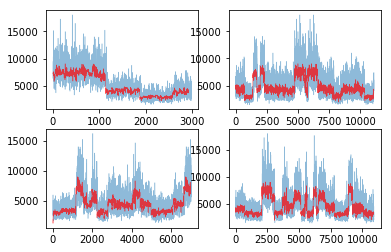

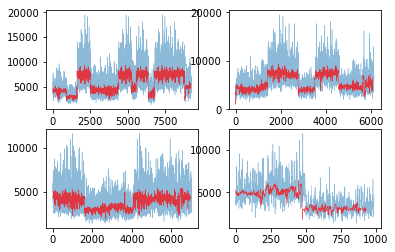

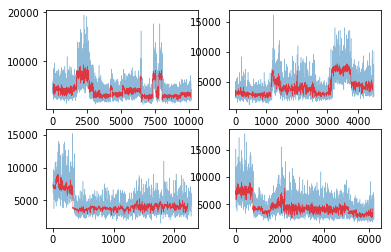

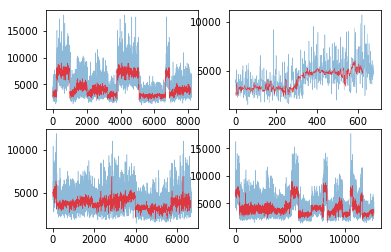

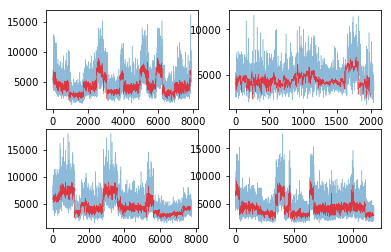

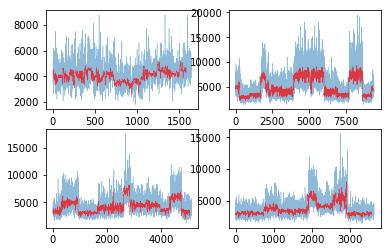

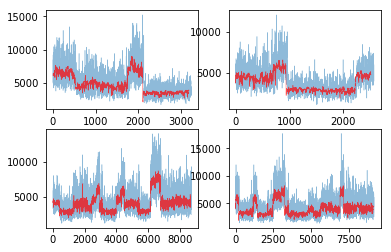

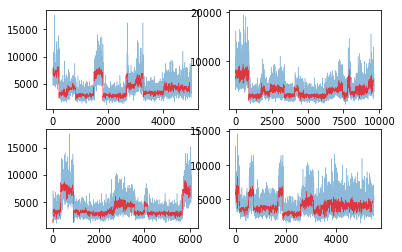

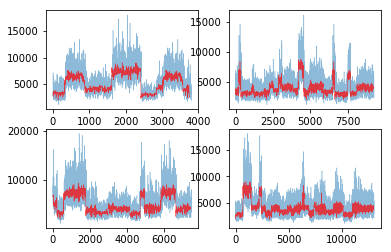

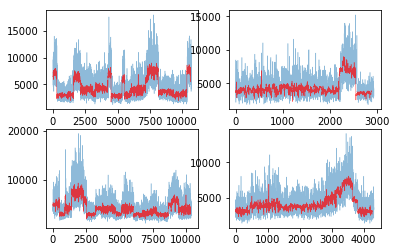

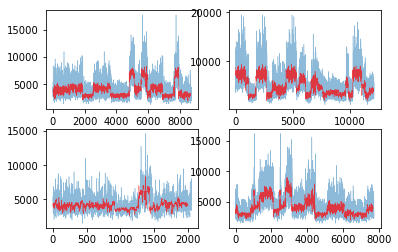

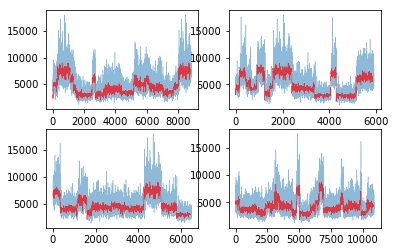

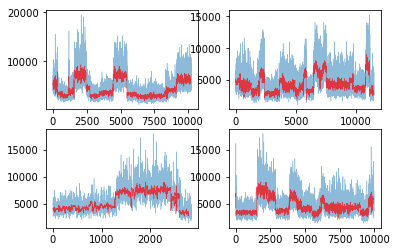

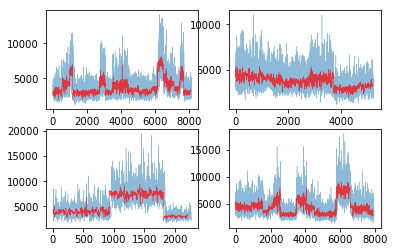

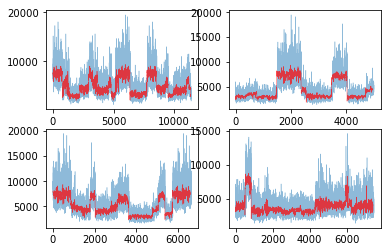

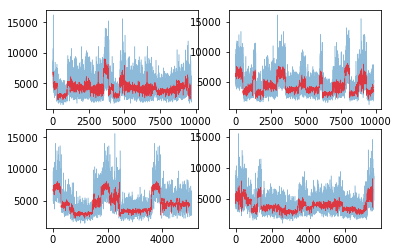

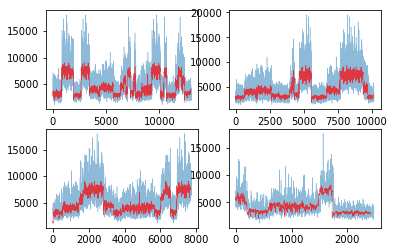

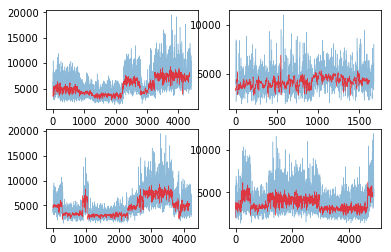

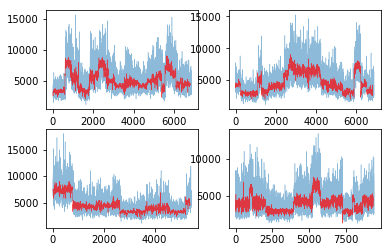

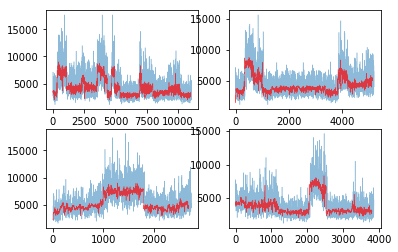

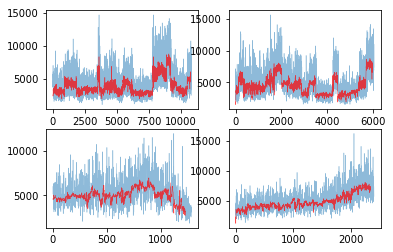

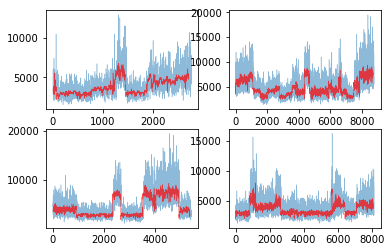

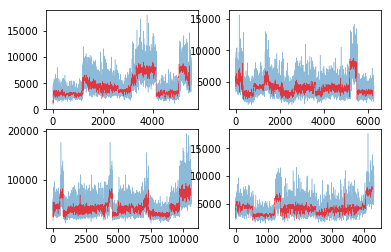

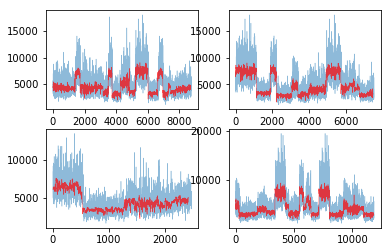

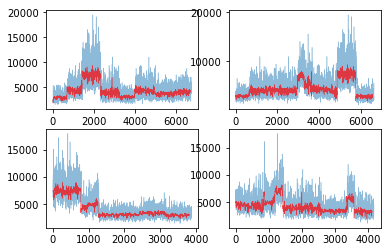

In [476]:
filename = 'synthetic_filtered.pdf'
with PdfPages(filename) as pdf:
    for i in range(25):
        fig = plt.figure()
        for j in range(4):
            ax = fig.add_subplot(2, 2, j+1)
            ax.plot(trajs[4*i+j], alpha=0.5, linewidth=0.5)
            ax.plot(filtered_trajs[4*i+j], alpha=0.7, linewidth=0.5, color='red')
        pdf.savefig(bbox_inches='tight')

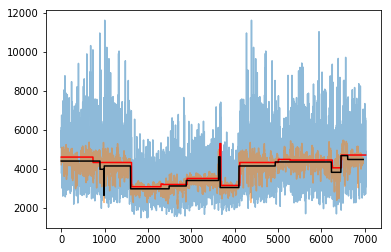

In [261]:
plt.plot(trajs[6], alpha=0.5)
plt.plot(filtered_trajs[6], alpha=0.5)
plt.plot(true_step['traj_6'], color='red')
plt.plot(detector_0.step_function['traj_6'], color='black')


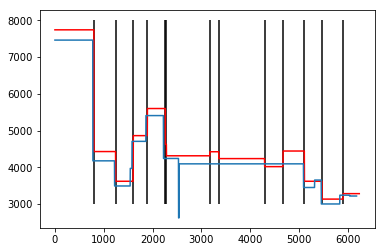

In [288]:
plt.plot(true_step['traj_11'][:], color='red')
plt.plot(detector_0.step_function['traj_11'][:])
plt.vlines(true_ts['traj_11'][:-1], ymin=3000, ymax=8000)

In [407]:
cm = np.zeros((10, 2, 2))
for d in detectors:
    tp = 0
    fp = 0
    fn = 0
    for t in range(len(trajs)):
        true_positive = []
        false_negative = true_ts['traj_{}'.format(t)][:-1]
        false_positive = np.asarray(detectors[d].change_points['traj_{}'.format(t)]['ts']+28)
        n += len(false_positive)
        index_neg = []
        for i, t_ts in enumerate(false_negative):
            for j, p_ts in enumerate(false_positive):
                if t_ts-100 <= p_ts <= t_ts+100:
                    true_positive.append(p_ts)
                    index_neg.append(i)
                    #index = np.where(false_negative==t_ts)
                    #false_negative = np.delete(false_negative, index)
                    #index = np.where(false_positive==p_ts)
                    false_positive = np.delete(false_positive, j)
                    break
        false_negative = np.delete(false_negative, index_neg)
        # sanity check
        assert(len(true_ts['traj_{}'.format(t)][:-1]) == (len(true_positive) + len(false_negative)))
        assert(len(np.asarray(detectors[d].change_points['traj_{}'.format(t)]['ts']+28)) == (len(true_positive) + len(false_positive)))
        tp += len(true_positive)
        fp += len(false_positive)
        fn += len(false_negative)
    m = int(d[-1])
    cm[m] = np.array(([tp, fp], [fn, 0]))

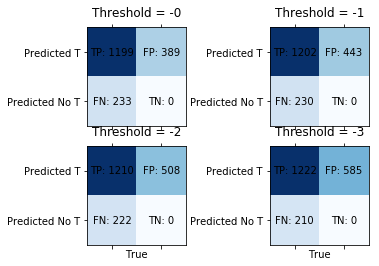

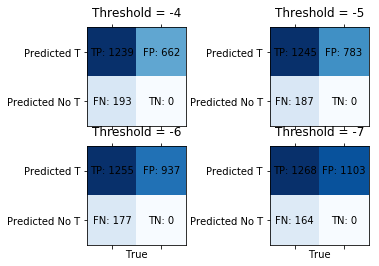

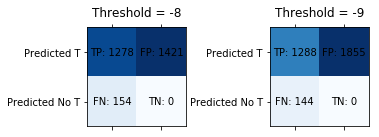

In [470]:
key = [['TP', 'FN'], ['FP', 'TN']]
labelx = ['True T', 'No T']
labely = ['Predicted T', 'Predicted No T']
filename = 'Confusion_matrix_filtered.pdf'
with PdfPages(filename) as pdf:
    for p in range(3):
        fig = plt.figure()
        for f in range(4):
            if p*4 + f > 9:
                break
            ax = fig.add_subplot(2, 2, f+1)
            confusion = ax.matshow(cm[p*4 + f], cmap='Blues')
            #for i, matrix in enumerate(cm):
            #    confusion = ax.matshow(matrix, cmap='Blues');
            for (j, k), label in np.ndenumerate(cm[p*4+f]):
                l = key[k][j] + ': ' + str(int(label))
                ax.text(k,j,l,ha='center',va='center')
            plt.title('Threshold = -{}'.format(str(p*4+f)));
            if f in (2, 3):
                plt.xlabel('True')
            #    ax.set_yticklabels([])
            #else:
            #    ax.set_yticklabels([' ']+labely)
            ax.set_xticklabels([])
            ax.set_yticklabels(['']+labely)
            #plt.ylabel('Predicted')
            #plt.xlabel('Predicted')
            #fig.colorbar(confusion)
        pdf.savefig(bbox_inches='tight')
        